In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import os
import sys

import numpy as np
import tensorflow as tf
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

print('sys_version', sys.version.replace('\n', ''))
print('virtual_env', os.environ.get('VIRTUAL_ENV', 'None'))
print('pwd', os.getcwd())
print('np ', np.__version__)
print('tf ', tf.__version__)

# fix import src problem
sys.path.append('..')

sys_version 3.5.2 (default, Nov 17 2016, 17:05:23) [GCC 5.4.0 20160609]
virtual_env None
pwd /home/marko/Projects/mozgalo2017/notebooks
np  1.11.1
tf  0.10.0


# Notebook utils

In [2]:
def to_rgb(img):
    """ To show using plt.imshow because cv2 uses BGR"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mozgalo

## Definitions

In [3]:
from src.modules.nn_utils import *
from src.modules.utils import *
from src.modules.dataset import *


DATASET_ROOT = '../dataset/extracted/'
csv_path = '../dataset/features.csv'
init_logging()

In [6]:
# Loading dataset
dataset = ImageDataset(DATASET_ROOT)
dataset.load_imgs()

2017-03-24 19:06:51 DEBUG    Loading imgs in dataset


100%|██████████| 6889/6889 [00:03<00:00, 2171.76it/s]


## Feature extraction

In [7]:
# Loading network
model = InceptionNet()
model.create_graph()

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py:1750: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  result_shape.insert(dim, 1)


### Extracting features and dumping to file

In [5]:
# slow on cpu: cca 1-2h for 7k images
# TODO: speedup: load in batches
dataset.extract_features(model)
dataset.store_features(csv_path)

100%|██████████| 40/40 [00:12<00:00,  1.73it/s]


### Load preextracted features from last run

In [6]:
dataset.load_features(csv_path)

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


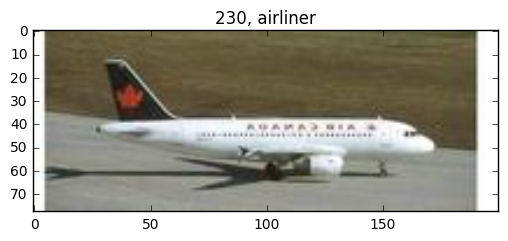

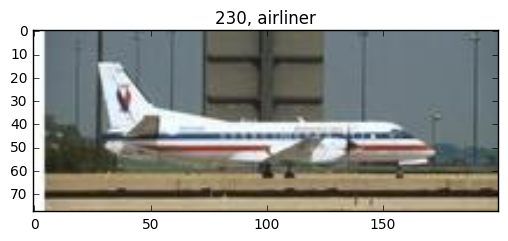

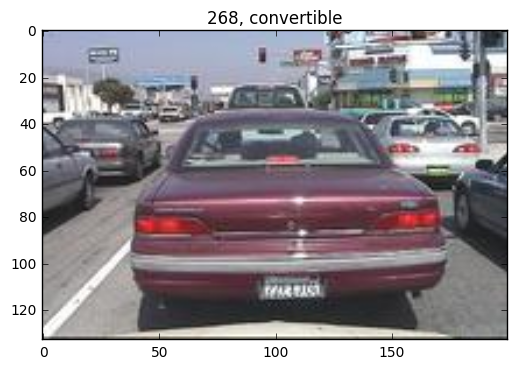

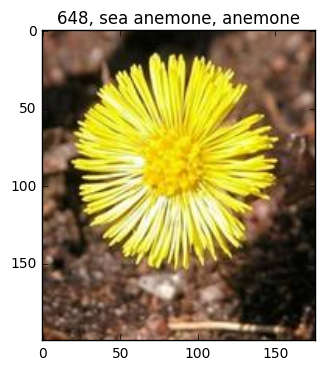

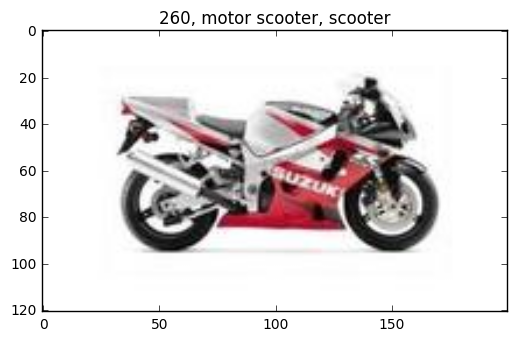

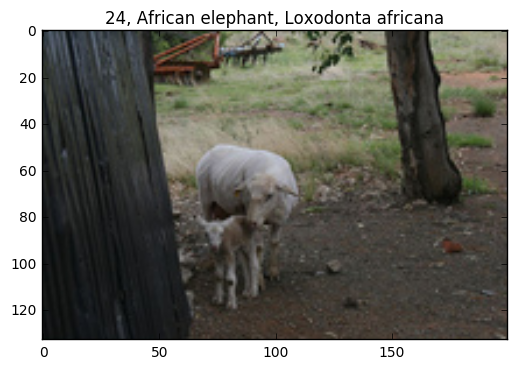

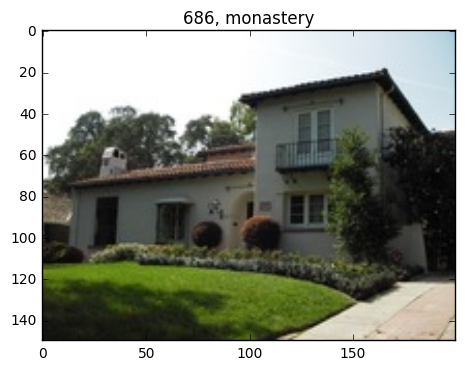

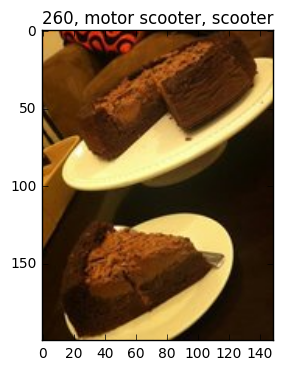

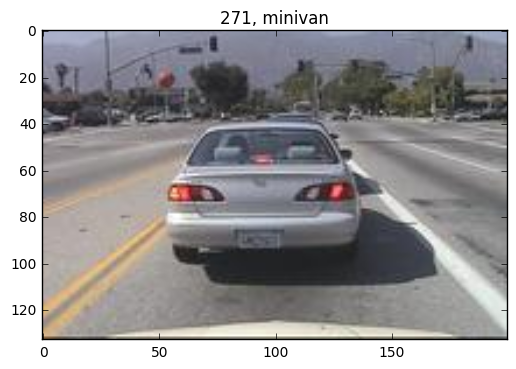

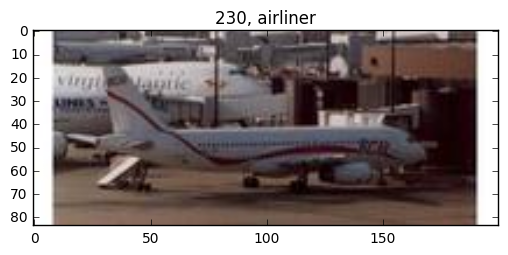

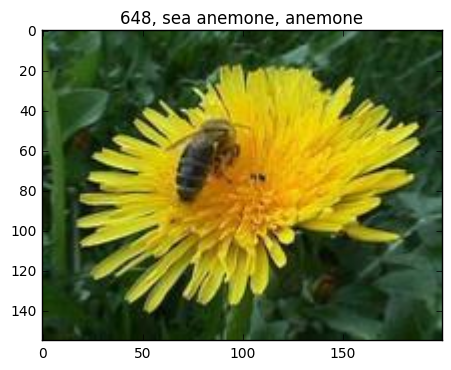

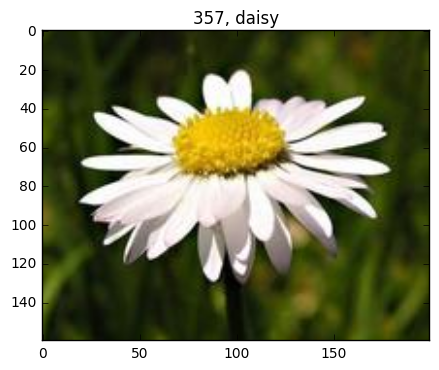

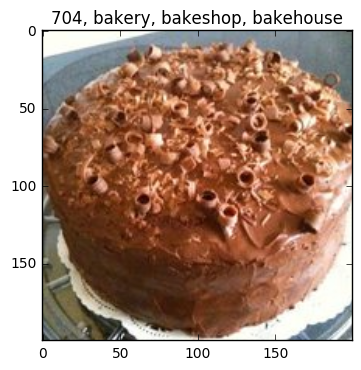

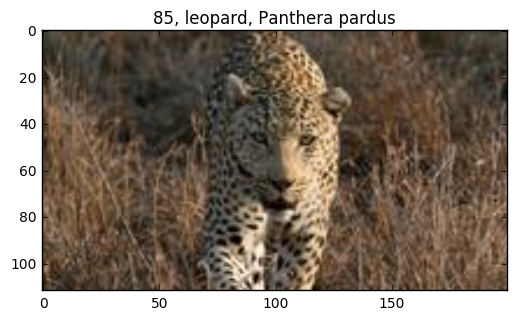

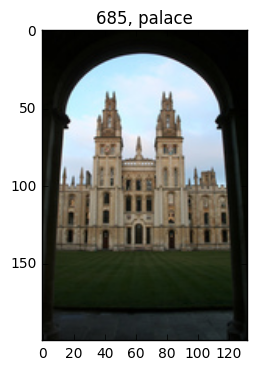

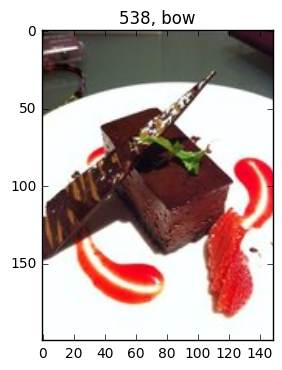

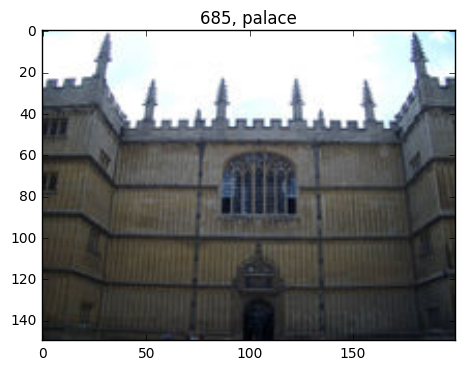

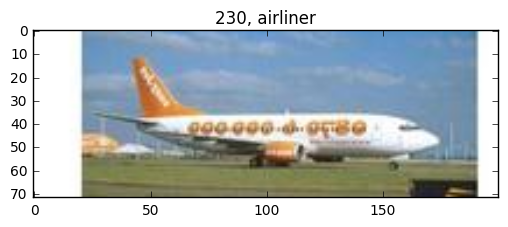

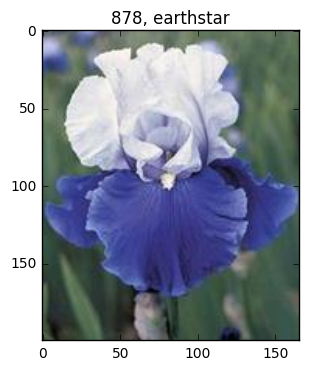

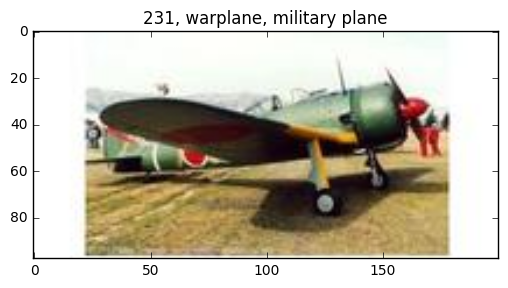

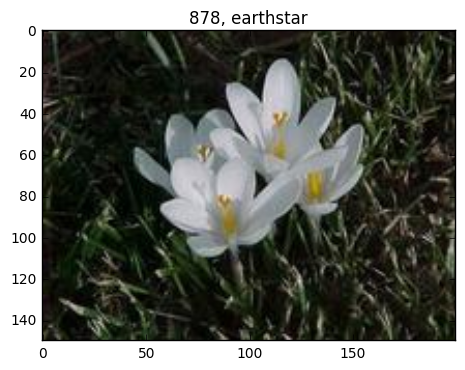

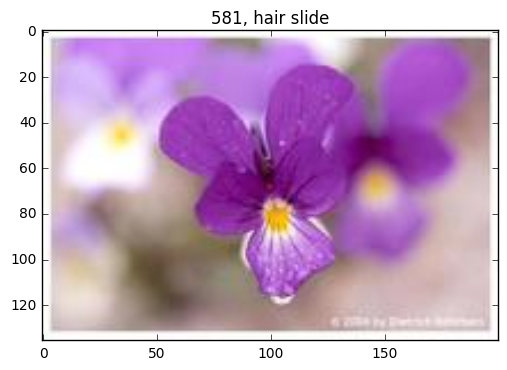

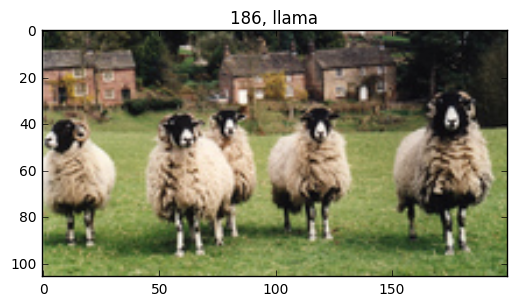

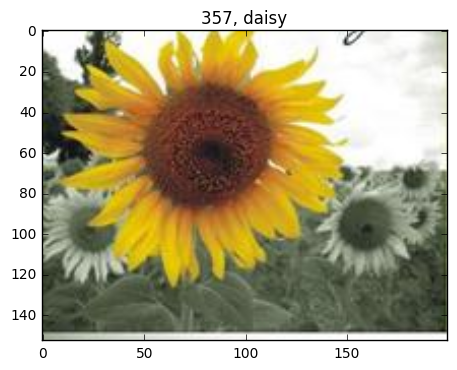

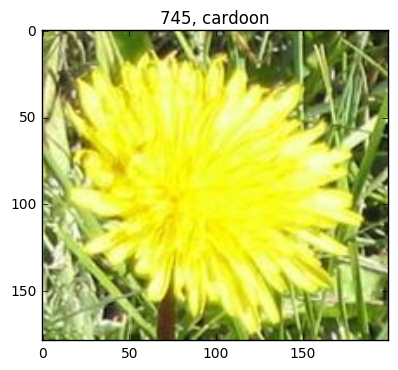

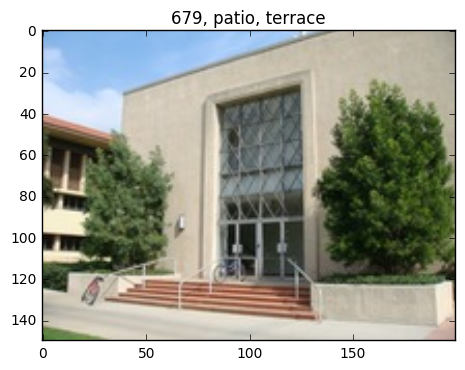

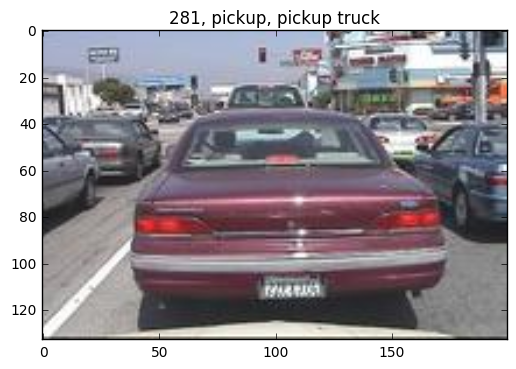

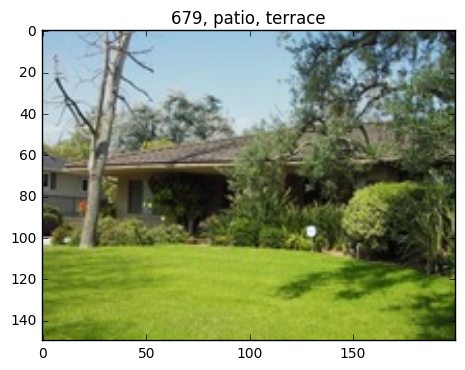

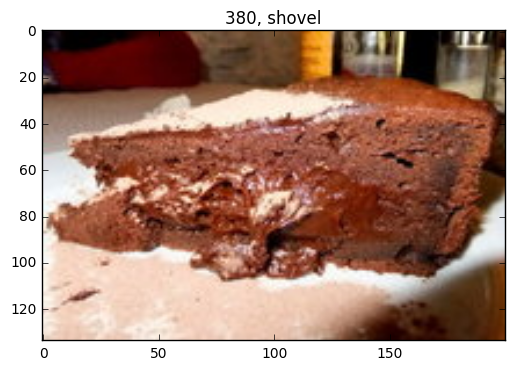

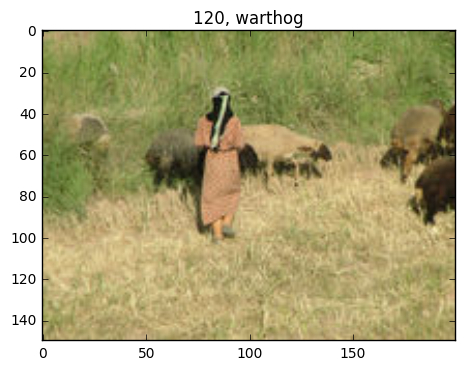

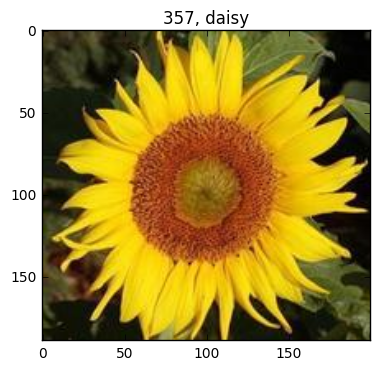

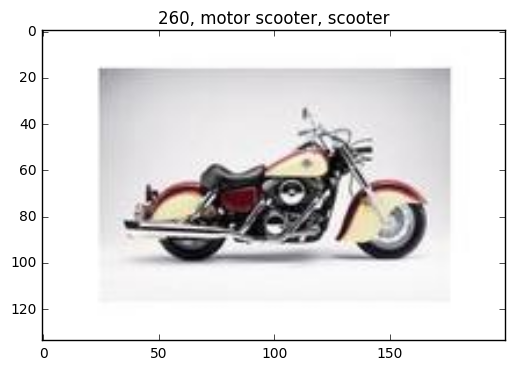

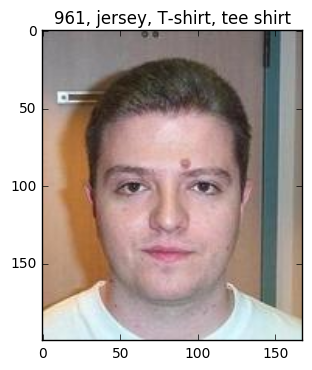

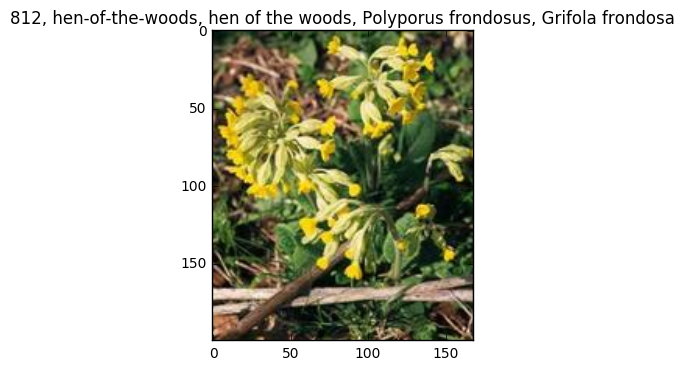

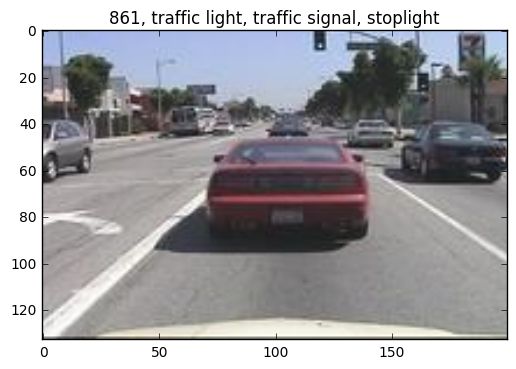

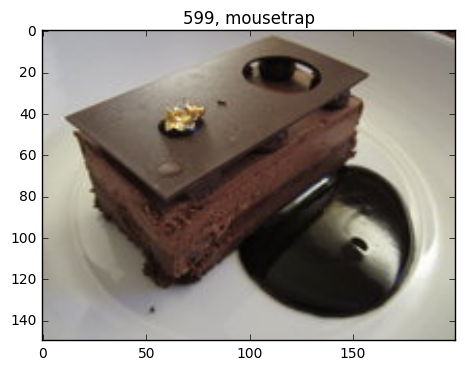

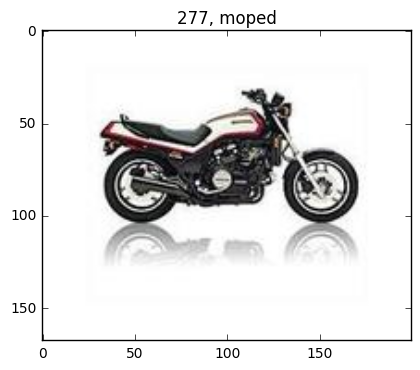

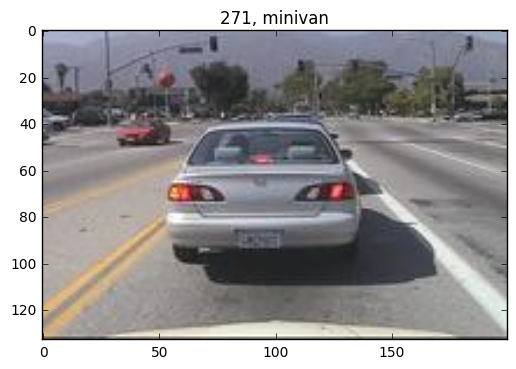

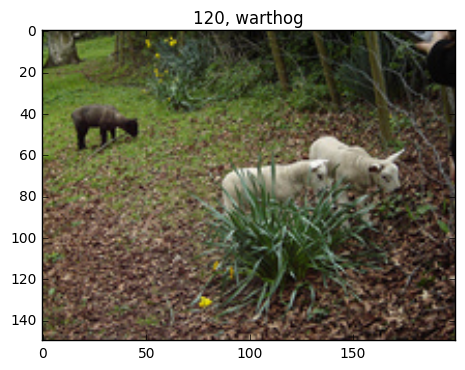

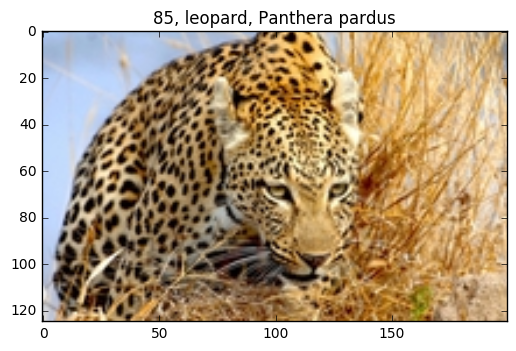

In [36]:
for i, p in enumerate(dataset.paths):
    plt.figure()
    cls = dataset.features[i].argmax()
    plt.title("%s, %s" % (cls, label_lookup[cls]))
    plt.imshow(to_rgb(dataset.imgs[i]))

In [44]:
a = np.array([1,2,3])

In [45]:
def foo():
    print("42")

In [47]:
class A:
    pass

In [7]:
# Downloaded from 
# https://gist.github.com/lukemetz/be6123c7ee3b366e333a
#from tsne import bh_sne
import numpy as np
from skimage.transform import resize
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

def gray_to_color(img):
    if len(img.shape) == 2:
        img = np.dstack((img, img, img))
    return img

def min_resize(img, size):
    """
    Resize an image so that it is size along the minimum spatial dimension.
    """
    w, h = map(float, img.shape[:2])
    if min([w, h]) != size:
        if w <= h:
            img = resize(img, (int(round((h/w)*size)), int(size)))
        else:
            img = resize(img, (int(size), int(round((w/h)*size))))
    return img

def image_scatter(features, images, img_res, res=4000, cval=1.):
    """
    Embeds images via tsne into a scatter plot.
    Parameters
    ---------
    features: numpy array
        Features to visualize
    images: list or numpy array
        Corresponding images to features. Expects float images from (0,1).
    img_res: float or int
        Resolution to embed images at
    res: float or int
        Size of embedding image in pixels
    cval: float or numpy array
        Background color value
    Returns
    ------
    canvas: numpy array
        Image of visualization
    """
    features = np.copy(features).astype('float64')
    images = [gray_to_color(image) for image in images]
    images = [min_resize(image, img_res) for image in images]
    max_width = max([image.shape[0] for image in images])
    max_height = max([image.shape[1] for image in images])

    #f2d = bh_sne(features)
    model = TSNE(n_components=2, random_state=0)
    f2d = model.fit_transform(features) 

    xx = f2d[:, 0]
    yy = f2d[:, 1]
    x_min, x_max = xx.min(), xx.max()
    y_min, y_max = yy.min(), yy.max()
    # Fix the ratios
    sx = (x_max-x_min)
    sy = (y_max-y_min)
    if sx > sy:
        res_x = sx/float(sy)*res
        res_y = res
    else:
        res_x = res
        res_y = sy/float(sx)*res

    canvas = np.ones((res_x+max_width, res_y+max_height, 3))*cval
    x_coords = np.linspace(x_min, x_max, res_x)
    y_coords = np.linspace(y_min, y_max, res_y)
    for x, y, image in zip(xx, yy, images):
        w, h = image.shape[:2]
        x_idx = np.argmin((x - x_coords)**2)
        y_idx = np.argmin((y - y_coords)**2)
        canvas[x_idx:x_idx+w, y_idx:y_idx+h] = image
    
    return canvas

In [48]:
x = A()

In [49]:
x.abc = foo

In [50]:
x.abc()

42
